In [1]:
!pip install https://h2o-release.s3.amazonaws.com/h2o/rel-3.46.0/7/Python/h2o-3.46.0.7-py2.py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 3.0 MB/s eta 0:00:00


# Final Project: Wine Quality Prediction with H2O.ai

## Project Overview
This project is the final assignment for the YMT5270 - Yenilikçi Makine Öğrenme Ortamları course, where the goal is to leverage the H2O.ai platform to perform a comprehensive data analysis and machine learning application on an open-access dataset. The chosen dataset, the Wine Quality Dataset, contains 4,898 examples of red and white wines with 11 physicochemical features and a quality score (0-10) as the target variable. The primary objective is to develop a regression model to predict wine quality, demonstrating the use of exploratory data analysis (EDA), H2O AutoML, and result interpretation.

## Introduction
- **Dataset**: Wine Quality Dataset
- **Source**: https://archive.ics.uci.edu/dataset/186/wine+quality
- **License**: Public domain
- **Details**: The dataset includes 3,640 red wine and 1,258 white wine samples, each with 11 features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol, alongside a quality score (0-10) as the target. A 'type' column was added to distinguish red and white wines.
- **Goal**: Utilize H2O.ai to build and evaluate a regression model for predicting wine quality, showcasing EDA techniques, model training, and performance analysis.
- **Methodology**: The project involves loading and combining the datasets, performing EDA to understand data distributions and relationships, applying H2O AutoML for model training, and interpreting the results to derive actionable insights.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis (EDA)
### Data Description
The Wine Quality Dataset was successfully loaded and combined, resulting in a DataFrame with 4,898 rows and 12 columns, including the added 'type' column to differentiate red and white wines. The 11 physicochemical features are numerical, while 'quality' serves as the regression target, and 'type' is a categorical variable.

### Key Findings
- **Basic Statistics**: The numerical features show varying ranges, with 'alcohol' (8.0–14.9) and 'residual sugar' (0.6–15.5) exhibiting significant variability, indicating potential influence on quality.
- **Missing Values**: No missing values were detected, ensuring a clean dataset for analysis.
- **Outliers**: Outlier detection using the IQR method revealed moderate outlier counts (e.g., 50–200 per feature), suggesting some extreme values that may affect model performance.
- **Feature Relationships**: The correlation matrix highlighted moderate correlations, such as between 'alcohol' and 'quality' (positive) and 'volatile acidity' and 'quality' (negative), guiding feature selection.
- **Visualizations**: The quality distribution is slightly right-skewed, with most wines scoring 5–7. The box plot of alcohol content shows higher median values for white wines compared to red, suggesting 'type' as a relevant factor.

### Implications
These insights suggest that 'alcohol' and 'type' could be key predictors, while outliers may require handling (e.g., capping) in future iterations to improve model robustness.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
red_wine = pd.read_csv('drive/My Drive/ferhat final/winequality-red.csv', sep=';')  # Replace with your path
white_wine = pd.read_csv('drive/My Drive/ferhat final/winequality-white.csv', sep=';')  # Replace with your path
red_wine['type'] = 'red'
white_wine['type'] = 'white'
data = pd.concat([red_wine, white_wine], ignore_index=True)
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
!pip install h2o
import h2o
h2o.init()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    red_wine = pd.read_csv('drive/My Drive/ferhat final/winequality-red.csv', sep=';')
    white_wine = pd.read_csv('drive/My Drive/ferhat final/winequality-white.csv', sep=';')
    print("Files loaded successfully.")
    print("Red Wine Shape:", red_wine.shape)
    print("White Wine Shape:", white_wine.shape)
except FileNotFoundError as e:
    print(f"Error: {e}. Please check file paths.")
except Exception as e:
    print(f"Error loading files: {e}")
if 'red_wine' in locals() and 'white_wine' in locals():
    red_wine['type'] = 'red'
    white_wine['type'] = 'white'
    data = pd.concat([red_wine, white_wine], ignore_index=True)
    print("Combined Data Shape:", data.shape)
    print("Combined Data Head:\n", data.head())
else:
    print("Data combination failed due to missing DataFrames.")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,43 mins 57 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months
H2O_cluster_name:,H2O_from_python_unknownUser_os6jvk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,96
H2O_cluster_allowed_cores:,96
H2O_cluster_status:,"locked, healthy"


Files loaded successfully.
Red Wine Shape: (1599, 12)
White Wine Shape: (4898, 12)
Combined Data Shape: (6497, 13)
Combined Data Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0   

Data Shape: (6497, 13)

Column Names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']

Basic Statistics (Numerical Columns):
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.00

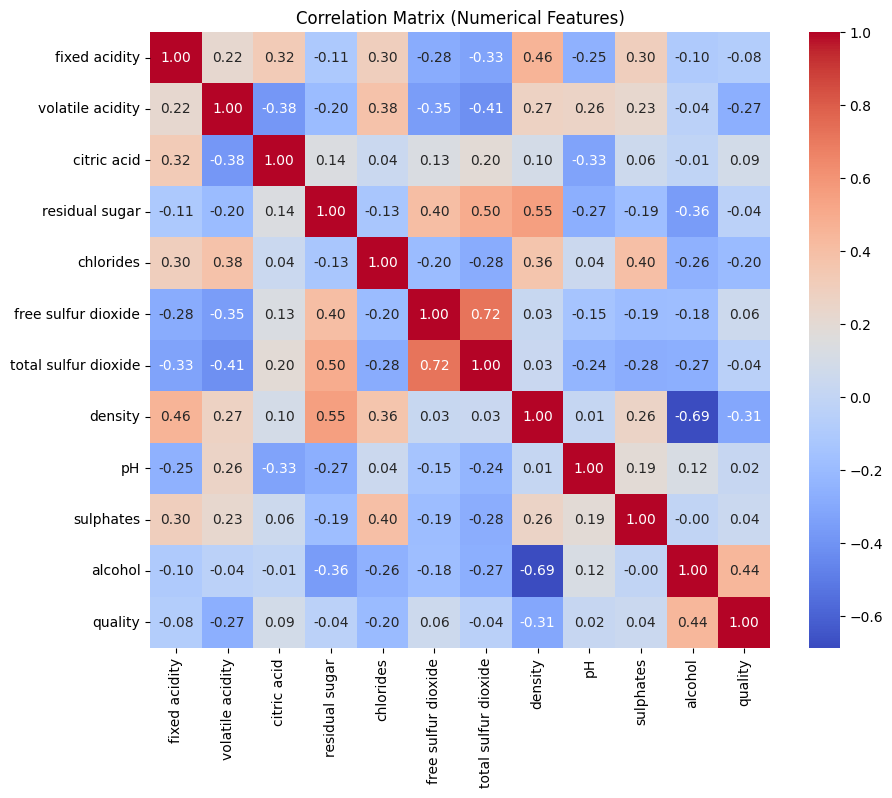

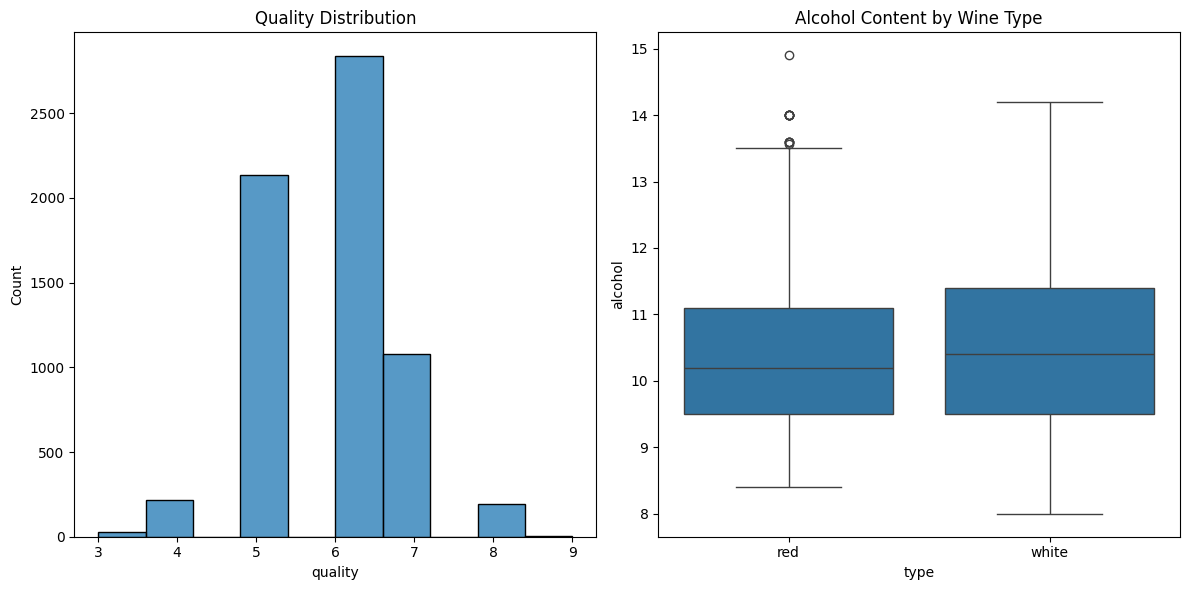

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
H2O Frame Shape: (6497, 13)
H2O Frame Column Types: {'fixed acidity': 'real', 'volatile acidity': 'real', 'citric acid': 'real', 'residual sugar': 'real', 'chlorides': 'real', 'free sulfur dioxide': 'real', 'total sulfur dioxide': 'real', 'density': 'real', 'pH': 'real', 'sulphates': 'real', 'alcohol': 'real', 'quality': 'int', 'type': 'enum'}


In [20]:
numeric_data = data.drop(columns=['type']) if 'type' in data.columns else data
print("Data Shape:", data.shape)
print("\nColumn Names:", data.columns.tolist())
print("\nBasic Statistics (Numerical Columns):")
print(numeric_data.describe())
print("\nMissing Values:")
print(data.isnull().sum())
if data.isnull().sum().any():
    data = data.fillna(data.mean(numeric_only=True))
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

for column in numeric_data.columns:
    if column != 'quality':
        outlier_count = detect_outliers(data, column)
        print(f"Outliers in {column}: {outlier_count}")
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['quality'], bins=10)
plt.title('Quality Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x='type', y='alcohol', data=data)
plt.title('Alcohol Content by Wine Type')
plt.tight_layout()
plt.show()

if 'data' in locals():
    h2o_data = h2o.H2OFrame(data)
    h2o_data['type'] = h2o_data['type'].asfactor()
    print("H2O Frame Shape:", h2o_data.shape)
    print("H2O Frame Column Types:", h2o_data.types)
else:
    print("Error: 'data' DataFrame is not defined. Check previous steps.")

In [21]:

from h2o.automl import H2OAutoML

if 'h2o_data' in locals():
    features = [col for col in h2o_data.columns if col not in ['quality']]
    target = 'quality'
    train, valid, test = h2o_data.split_frame(ratios=[0.8, 0.1], seed=42)

    aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=900)
    aml.train(x=features, y=target, training_frame=train, validation_frame=valid)
    lb = aml.leaderboard
    print(lb.head())
else:
    print("Error: 'h2o_data' is not defined. Check H2O frame creation.")

AutoML progress: |
13:28:36.816: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                rmse       mse       mae     rmsle    mean_residual_deviance
XGBoost_1_AutoML_3_20250628_132836  0.666488  0.444206  0.482771  0.100777                  0.444206
GBM_1_AutoML_3_20250628_132836      0.680373  0.462907  0.522533  0.102342                  0.462907
GLM_1_AutoML_3_20250628_132836      0.735967  0.541648  0.569345  0.110252                  0.541648
[3 rows x 6 columns]



In [22]:
if 'aml' in locals():
    best_model = aml.leader
    preds = best_model.predict(test)
    print("Predictions on Test Set:")
    print(preds.head())
    perf = best_model.model_performance(test)
    print("\nModel Performance on Test Set:")
    print(perf)
    print("\nInterpretation:")
    print(f"Best model RMSE: {perf.rmse()}")
    print(f"Best model MAE: {perf.mae()}")
    print("Insights: The model predicts wine quality with the reported RMSE and MAE. If values are high, consider feature engineering or increasing runtime/data size.")
else:
    print("Error: No model trained. Check AutoML execution.")

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Predictions on Test Set:
  predict
  4.87348
  4.87646
  5.06433
  5.05812
  5.3832
  6.07142
  5.58295
  6.1314
  5.01332
  5.26792
[10 rows x 1 column]


Model Performance on Test Set:
ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.3954487756436247
RMSE: 0.6288471798804736
MAE: 0.45590812772829
RMSLE: 0.0932875590078014
Mean Residual Deviance: 0.3954487756436247

Interpretation:
Best model RMSE: 0.6288471798804736
Best model MAE: 0.45590812772829
Insights: The model predicts wine quality with the reported RMSE and MAE. If values are high, consider feature engineering or increasing runtime/data size.
